In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import os
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs


In [2]:
#removes white space around figures when exporting to a local machine - this is not necessary when using the save buttons in the top right corners in VScode.
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [2]:
######################### lcic runs thetao

#lcic historical thetao
fn_thetao_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/thetao/gn/v20230713/*.nc'
thetao_lcic_hist = xr.open_mfdataset(fn_thetao_lcic_hist)

#lcic 585 thetao
fn_thetao_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/thetao/gn/v20230720/*.nc'
thetao_lcic_585 = xr.open_mfdataset(fn_thetao_lcic_585)

######################### 5icu runs thetao

#5icu hist thetao
fn_thetao_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/thetao/gn/v20230720/*.nc'
thetao_5icu_hist = xr.open_mfdataset(fn_thetao_5icu_hist)

#5icu 585 thetao
fn_thetao_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/thetao/gn/v20230720/*.nc'
thetao_5icu_585 = xr.open_mfdataset(fn_thetao_5icu_585)


In [3]:
######################## 5icu runs so

#5icu hist so
fn_so_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/so/gn/v20230720/*.nc'
so_5icu_hist = xr.open_mfdataset(fn_so_5icu_hist)

#5icu 585 so
fn_so_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/so/gn/v20230720/*.nc'
so_5icu_585 = xr.open_mfdataset(fn_so_5icu_585)

######################## lcic runs so
#lcic historical so
fn_so_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/so/gn/v20230713/*.nc'
so_lcic_hist = xr.open_mfdataset(fn_so_lcic_hist)

# #lcic 585 so
folder = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/so/gn/v20230720'
files = os.listdir(folder)
substring = 'so_Omon_EC-Earth3_ssp585_r1i1p1f1_gn_20'
selected_files = [file for file in files if substring in file]
so_lcic_585 = xr.open_mfdataset([os.path.join(folder, file) for file in selected_files], combine='by_coords')

In [4]:
#reading in my own datafiles for the CMIP6 version of the model, containing the 1984-2014 and 2070-2100 means of the thetao data instead.
#sd  = Standard - These are the CMIP6 r1i1p1f1 means.
thetao_sd_hist = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaorec.nc')
thetao_sd_585 = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaofut.nc')
thetao_sd_past = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaopast.nc')

so_sd_hist = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/so/sorec.nc')
so_sd_585 = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/so/sofut.nc')
so_sd_past = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/so/sopast.nc')

thetao_lcic_hist = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetao_lcic_hist.nc')
#thetao_lcic_hist = thetao_lcic_hist.to_array(dim = 'thetao')

thetao_lcic_585 = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetao_lcic_585.nc')
#thetao_lcic_585 = thetao_lcic_585.to_array(dim = 'thetao')

thetao_5icu_hist = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetao_5icu_hist.nc')
#thetao_5icu_hist = thetao_5icu_hist.to_array(dim = 'thetao')

thetao_5icu_585 = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetao_5icu_585.nc')
#thetao_5icu_585 = thetao_5icu_585.to_array(dim = 'thetao')

so_lcic_hist = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/so/so_lcic_hist.nc')
#so_lcic_hist = so_lcic_hist.to_array(dim = 'so')

so_lcic_585 = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/so/so_lcic_585.nc')
#so_lcic_585 = so_lcic_585.to_array(dim = 'so')

so_5icu_hist = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/so/so_5icu_hist.nc')
#so_5icu_hist = so_5icu_hist.to_array(dim = 'so')

so_5icu_585 = xr.open_dataset('/usr/people/ijzerman/GradProject/DataFiles/so/so_5icu_585.nc')
#so_5icu_585 = so_5icu_585.to_array(dim = 'so')

In [5]:
sizemlf = 2 #size multiplication factor for higher res plots

In [6]:
'''Map plotter function that removes the bulk of the code used for plotting from the code where the figure is made.

It takes the following arguments:

data = specific data from a dataset you want to plot, e.g. a selected of the means over a certain period from a larger dataset.
dataset = the full dataset from which data is derived, has to be provided for the corresponding coordinate variables.
ax = must be specified for the arrangement of the subplots in the full figure.
cmin, cmax = specifies the boundary values for the colormap.
titlestring = takes a string in accolades, this becomes the subplot title.

This function also allows to make figures with a split colourbar, and allows to use one single colourbar for all subplots in a figure.'''

def map_plotter(data, dataset, ax, cmin, cmax, titlestring): #
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.gridlines()
    ax.coastlines()

    # Make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    
    #split colourbar
    colds = plt.cm.Blues(np.linspace(cmin, 0, np.absolute(cmin)*1000)/cmin)
    warms = plt.cm.Reds(np.linspace(0, cmax, cmax*1000)/cmax)

    colors = np.vstack((colds, warms))
    colormap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

    #actual plotting
    im = ax.pcolormesh(dataset.longitude, dataset.latitude,
                    data, 
                    cmap=colormap, vmin = cmin, vmax = cmax,
                    transform=ccrs.PlateCarree())
    ax.set_title(titlestring, fontsize = 7*sizemlf)

    return im

In [1]:
cmin = -2
cmax = 4

# Create a figure with 8 subplots 2 by 3
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of TOS for each model version", fontsize=22)

images_for_colorbar = []

im = map_plotter(thetao_sd_hist.isel(lev=1), 
            thetao_sd_hist, axes[0, 0], cmin, cmax, 
            'CMIP6 version')
images_for_colorbar.append(im)

im = map_plotter(thetao_sd_585.isel(lev=1), 
            thetao_sd_585, axes[1, 0], cmin, cmax, 
            ' ')
images_for_colorbar.append(im)

im = map_plotter(thetao_5icu_hist.thetao.isel(lev=1), 
            thetao_5icu_hist, axes[0, 1], cmin, cmax, 
            'Exp. 1')
images_for_colorbar.append(im)

im = map_plotter(thetao_5icu_585.thetao.isel(lev=1), 
            thetao_5icu_585, axes[1, 1], cmin, cmax, 
            ' ')
images_for_colorbar.append(im)

im = map_plotter(thetao_lcic_hist.thetao.isel(lev=1), 
            thetao_lcic_hist, axes[0, 2], cmin, cmax, 
            'Exp. 2')
images_for_colorbar.append(im)

im = map_plotter(thetao_lcic_585.thetao.isel(lev=1), 
            thetao_lcic_585, axes[1, 2],  cmin, cmax, 
            ' ')
images_for_colorbar.append(im)


plt.figtext(0.07, 0.59, 'Means 1984-2014', fontsize = 16, rotation = 'vertical')
plt.figtext(0.07, 0.14, 'Means 2070-2100', fontsize = 16, rotation = 'vertical')

cbar = fig.colorbar(images_for_colorbar[0], ax=axes, orientation='vertical', fraction =0.025)
cbar.set_label('TOS [°C]', fontsize = 12)
cbar.ax.tick_params(labelsize=12)

#plt.tight_layout(pad=1)
#plt.subplots_adjust(top=0.9)
plt.show()

NameError: name 'plt' is not defined

In [8]:
'''Map plotter function that removes the bulk of the code used for plotting from the code where the figure is made.

It takes the following arguments:

data = specific data from a dataset you want to plot, e.g. a selected of the means over a certain period from a larger dataset.
dataset = the full dataset from which data is derived, has to be provided for the corresponding coordinate variables.
ax = must be specified for the arrangement of the subplots in the full figure.
colormap = specifies the colormap used in the plot.
cmin, cmax = specifies the boundary values for the colormap.
titlestring = takes a string in accolades, this becomes the subplot title.
cbarlabel = takes a string in accolades, this becomes the subplot colorbar label.'''

def map_plotter(data, dataset, ax, colormap, cmin, cmax, titlestring, cbarlabel): #
    #limit axes extent and adding cartopy features.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.gridlines()
    ax.coastlines()

    # Make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    # Actual plotting
    im = ax.pcolormesh(dataset.longitude, dataset.latitude,
                    data, 
                    cmap=colormap, vmin = cmin, vmax = cmax,
                    transform=ccrs.PlateCarree())
    ax.set_title(titlestring, fontsize = 10*sizemlf)

    #! colourbar settings
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbarlabel, fontsize = 8*sizemlf)
    cbar.ax.tick_params(labelsize=8*sizemlf)

    return im


In [10]:
sizemlf = 3 #size multiplication factor for higher res plots.

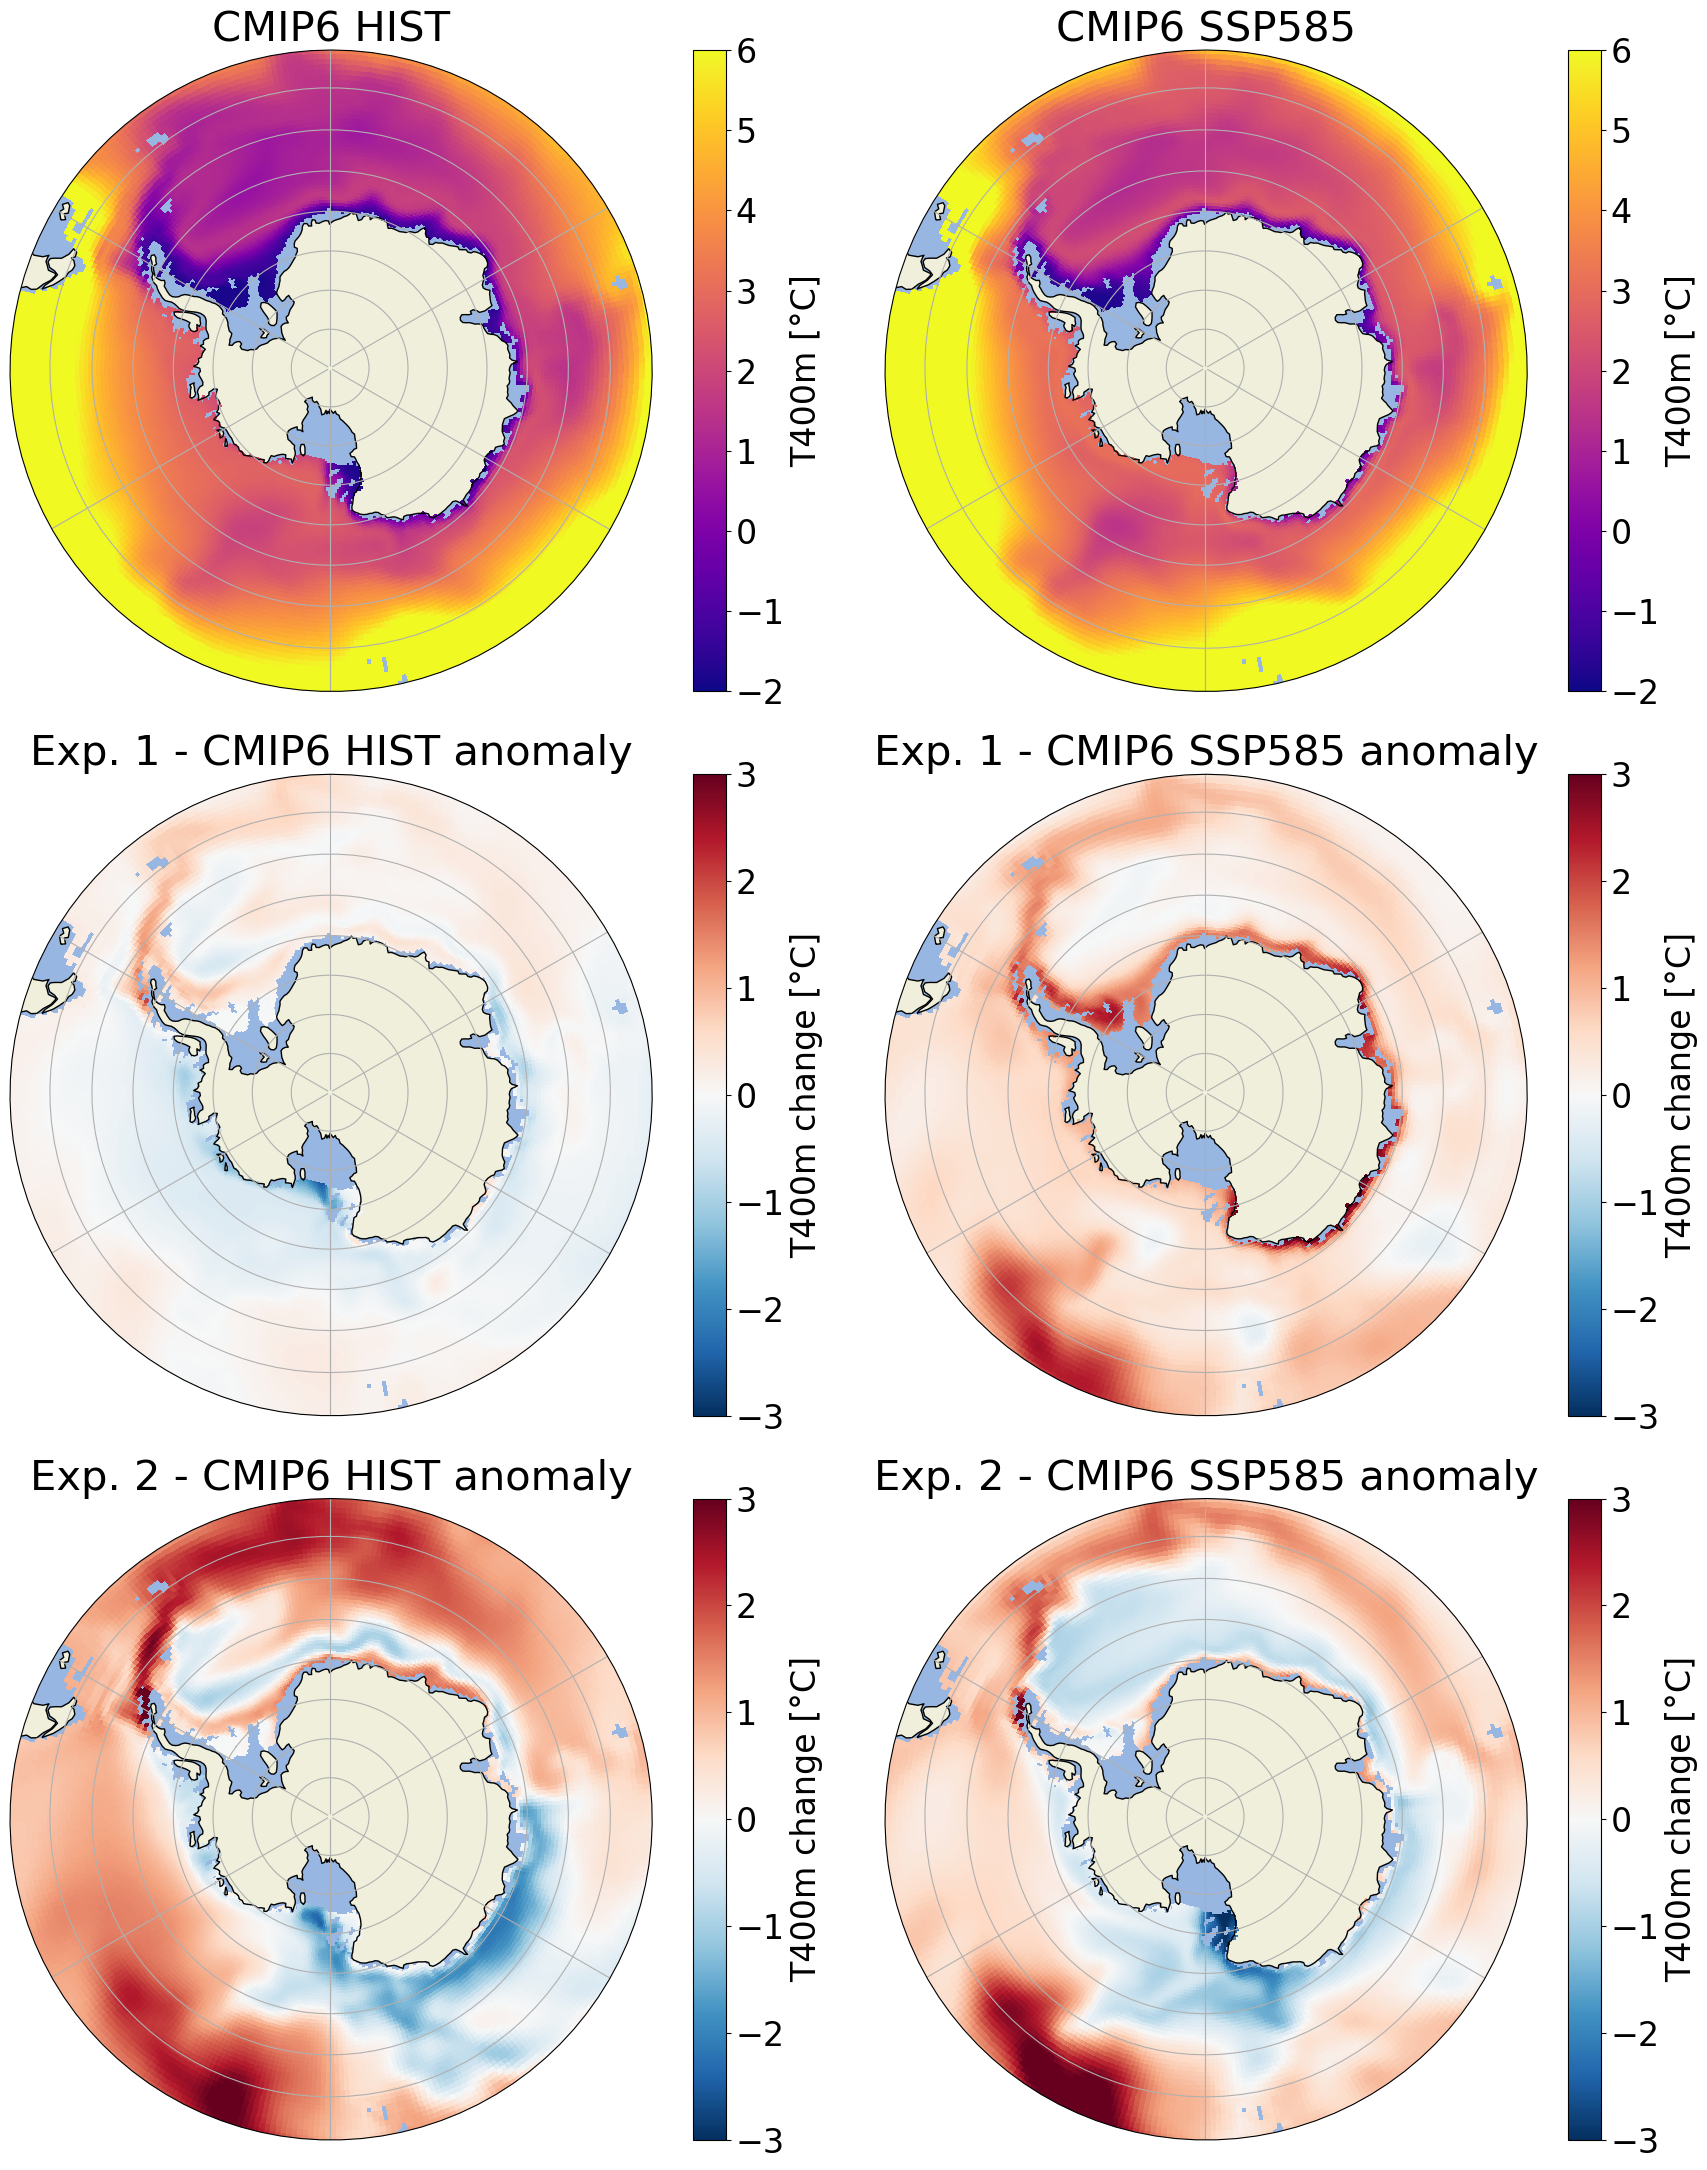

In [13]:
# Create a figure with 8 subplots 3 by 2
fig, axes = plt.subplots(3, 2, figsize=(6*sizemlf, 8*sizemlf), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.tight_layout(pad=2)
#fig.suptitle("T400m", fontsize=28)
level = 37 # this controls the depth level you plot, perhaps you can add some code here to make this more intuitive.

cmin = -2
cmax = 6
map_plotter(thetao_sd_hist.isel(lev=level), 
            thetao_sd_hist, axes[0, 0], 'plasma', cmin, cmax, 
            'CMIP6 HIST', 'T400m [°C]')

map_plotter(thetao_sd_585.isel(lev=level), 
            thetao_sd_585, axes[0, 1], 'plasma', cmin, cmax, 
            'CMIP6 SSP585', 'T400m [°C]')

cmin = -3
cmax = 3
map_plotter(thetao_5icu_hist.thetao.isel(lev=level) - thetao_sd_hist.isel(lev=level), 
            thetao_5icu_hist, axes[1, 0], 'RdBu_r', cmin, cmax, 
            'Exp. 1 - CMIP6 HIST anomaly', 'T400m change [°C]')

map_plotter(thetao_5icu_585.thetao.isel(lev=level) - thetao_sd_585.isel(lev=level), 
            thetao_5icu_585, axes[1, 1], 'RdBu_r', cmin, cmax, 
            'Exp. 1 - CMIP6 SSP585 anomaly', 'T400m change [°C]')

cmin = -3
cmax = 3
map_plotter(thetao_lcic_hist.thetao.isel(lev=level) - thetao_sd_hist.isel(lev=level), 
            thetao_lcic_hist, axes[2, 0], 'RdBu_r', cmin, cmax, 
            'Exp. 2 - CMIP6 HIST anomaly', 'T400m change [°C]')

map_plotter(thetao_lcic_585.thetao.isel(lev=level) - thetao_sd_585.isel(lev=level), 
            thetao_lcic_585, axes[2, 1], 'RdBu_r', cmin, cmax, 
            'Exp. 2 - CMIP6 SSP585 anomaly', 'T400m change [°C]')

# plt.figtext(0.01, 0.6, 'Means 1984-2014', fontsize = 10*sizemlf, rotation = 'vertical')
# plt.figtext(0.01, 0.11, 'Means 2070-2100', fontsize = 10*sizemlf, rotation = 'vertical')

plt.tight_layout(pad=1.2*sizemlf)
plt.subplots_adjust(top=0.9)
plt.show()

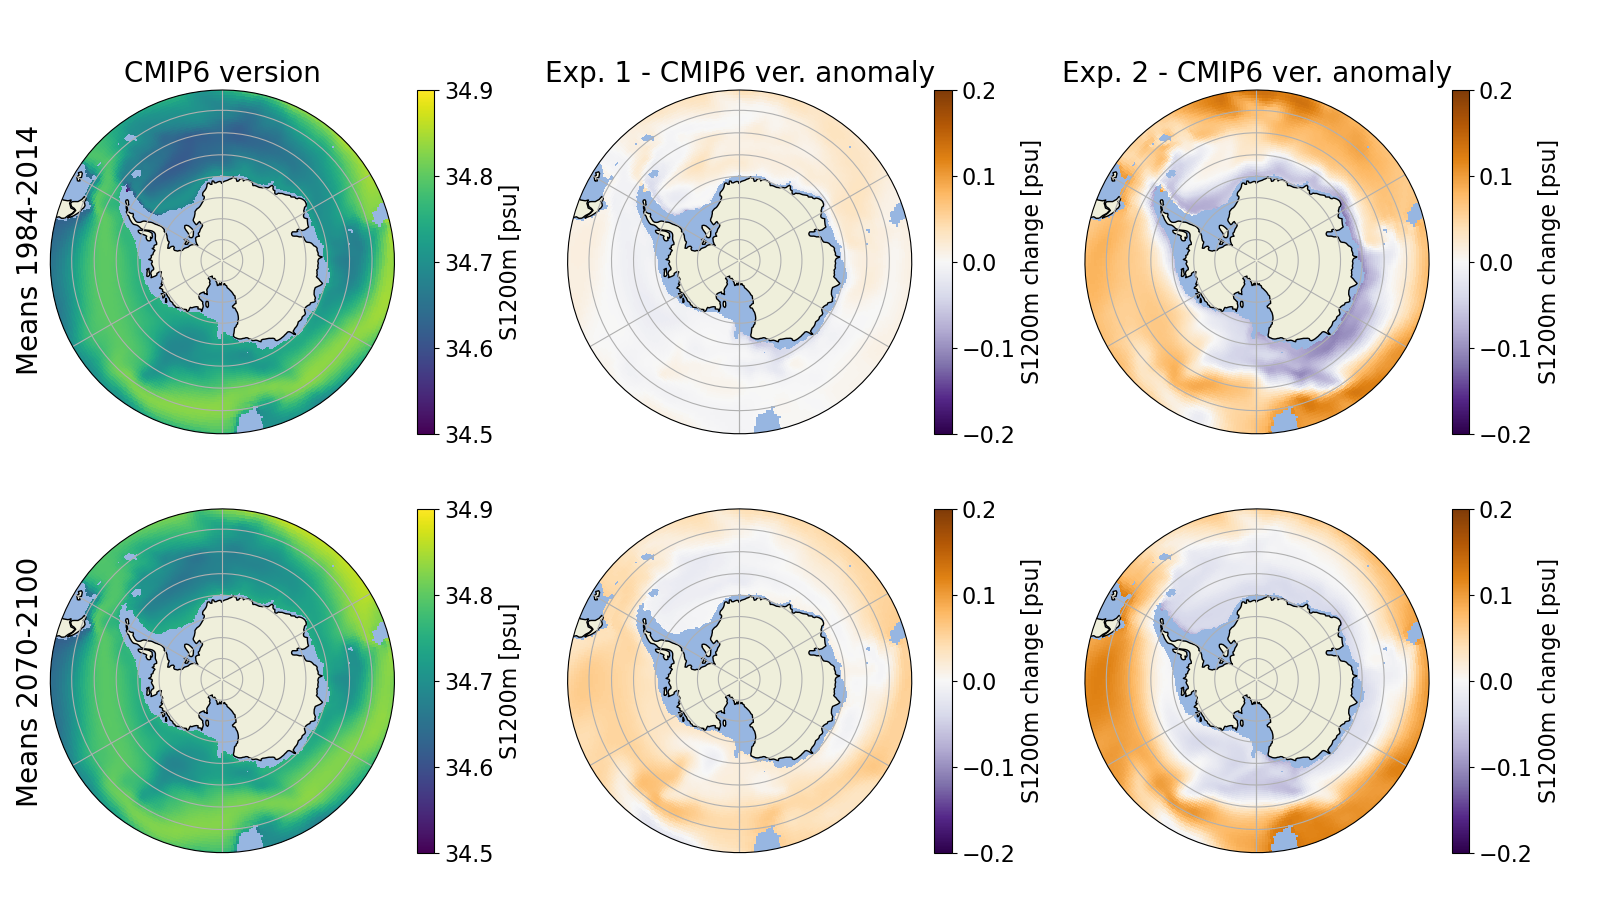

In [ ]:
# Create a figure with 8 subplots 2 by 3
fig, axes = plt.subplots(2, 3, figsize=(8*sizemlf, 4.5*sizemlf), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.tight_layout(pad=2)
#fig.suptitle("S1200m", fontsize=28)
level = 48 # (1200m) this controls the depth level you plot, perhaps you can add some code here to make this more intuitive.


cmin = 34.5
cmax = 34.9
map_plotter(so_sd_hist.isel(lev=level), 
            so_sd_hist, axes[0, 0], 'viridis', cmin, cmax, 
            'CMIP6 version', 'S1200m [psu]')

map_plotter(so_sd_585.isel(lev=level), 
            so_sd_585, axes[1, 0], 'viridis', cmin, cmax, 
            ' ', 'S1200m [psu]')

cmin = -0.2
cmax = 0.2
map_plotter(so_5icu_hist.so.isel(lev=level) - so_sd_hist.isel(lev=level), 
            so_5icu_hist, axes[0, 1], 'PuOr_r', cmin, cmax, 
            'Exp. 1 - CMIP6 ver. anomaly', 'S1200m change [psu]')

map_plotter(so_5icu_585.so.isel(lev=level) - so_sd_585.isel(lev=level), 
            so_5icu_585, axes[1, 1], 'PuOr_r', cmin, cmax, 
            ' ', 'S1200m change [psu]')

cmin = -0.2
cmax = 0.2
map_plotter(so_lcic_hist.so.isel(lev=level) - so_sd_hist.isel(lev=level), 
            so_lcic_hist, axes[0, 2], 'PuOr_r', cmin, cmax, 
            'Exp. 2 - CMIP6 ver. anomaly', 'S1200m change [psu]')

map_plotter(so_lcic_585.so.isel(lev=level) - so_sd_585.isel(lev=level), 
            so_lcic_585, axes[1, 2], 'PuOr_r', cmin, cmax, 
            ' ', 'S1200m change [psu]')

plt.figtext(0.01, 0.59, 'Means 1984-2014', fontsize = 10*sizemlf, rotation = 'vertical')
plt.figtext(0.01, 0.11, 'Means 2070-2100', fontsize = 10*sizemlf, rotation = 'vertical')

plt.tight_layout(pad=1.2*sizemlf)
plt.subplots_adjust(top=0.9)
plt.show()